In [11]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
import numpy as np
import nbimporter
#%run part1_data_collection.ipynb
from part1_data_analysis import tokens_segmentation
#%run part1_data_analysis.ipynb


In [2]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,Pavlos Prosalentis (Greek: Παύλος Προσαλέντης;...,1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Gerhard Henning (27 May 1880 – 16 September 19...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,"José Belloni (September 12, 1882 – November 2...",1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [3]:
df_cluster.shape

(260, 2)

In [4]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [5]:
df_cluster = shuffle(df_cluster)
df_cluster.head(20)

,text,category
117,Calixte Dakpogan (born 1958) is a Beninese scu...,1
18,Alejandro Colina (8 February 1901–1976) was a ...,1
15,Grigor Artsruni (also spelled as Krikor Ardzru...,0
202,Sérgio Pereira Couto (born 6 March 1967) is a ...,0
128,Nerses Ounanian (Armenian: Ներսէս Ունանեան) (1...,1
43,Antonio de Jesus Cortez Espina (born August 31...,0
49,Živko Čingo (also spelt Zhivko Chingo) (13 Aug...,0
35,Sir Thomas Ekins Fuller (1831–1910) was edit...,0
51,Georgy Arkadyevich Arbatov (Russian: Гео́ргий ...,0
79,"XIII (""Thirteen"") is a Belgian graphic novel ...",0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_cluster['text'], df_cluster['category'], test_size=0.2, random_state=42)

In [13]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=800, 
                                       use_idf=True,
                                       stop_words='english')
                                       #ngram_range=(1, 2))
                                       #tokenizer=nltk.word_tokenize)
                                      

# Fit the vectorizer to text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)




In [14]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['000' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1918' '1931'
 '1941' '1944' '1945' '1949' '1953' '1954' '1955' '1956' '1959' '1960'
 '1961' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1983' '1984'
 '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '20' '2000' '2001' '2002' '2003'
 '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2022' '2023' '21' '22'
 '24' '25' '26' '27' '30' '31' '978' 'academy' 'according' 'accused'
 'active' 'activities' 'added' 'addition' 'aden' 'adventures' 'africa'
 'african' 'age' 'agustín' 'aires' 'ajl' 'akpan' 'al' 'alejandro'
 'alongside' 'alpuy' 'america' 'american' 'anatsui' 'anchor' 'andrew'
 'angeles' 'anniversary' 'anthony' 'anti' 'antonio' 'appeared' 'appears'
 'appointed' 'april' 'archived' 'arden' 'argentina' 'armenian' 'army'
 'art' 'arte

In [15]:

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(X_train_tfidf)

# Get cluster assignments for the training data

clusters_train = km.labels_
print("Training data cluster assignments:", clusters_train)

# Apply the model to the test data to get cluster assignments

clusters_test = km.predict(X_test_tfidf)
print("Test data cluster assignments:", X_test_tfidf)



Training data cluster assignments: [1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0
 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0]
Test data cluster assignments:   (0, 7)	0.10423915543404502
  (0, 111)	0.09706024492222308
  (0, 112)	0.08246911173144947
  (0, 163)	0.08939865874625157
  (0, 169)	0.06713314263594454
  (0, 179)	0.10702184926442769
  (0, 184)	0.10560150756110057
  (0, 212)	0.09026553846559565
  (0, 238)	0.10167073516638295
  (0, 240)	0.09206992344891621
  (0, 269)	0.18602013984322271
  (0, 282)	0.06300777497998465
  (0, 304)	0.4346272696452348
  (0, 316)	0.1004570380412313
  (0, 325)	0.053021144020373764
  (0, 330)	0.11710986660909611
  (0, 357)	0.11168

In [16]:
print("Top terms per cluster:")
true_k = np.unique(km.labels_).shape[0]
print("True number of clusters: ", true_k)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# for each cluster
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    # print tokens of clusters centroids (TF-IDF decreasing values)
    for ind in order_centroids[i, :10]:  # Adjust the number here to display more or fewer terms
        print(' %s' % features[ind], end='')
    print('\n')


Top terms per cluster:
True number of clusters:  2
Cluster 0: editor journalist newspaper russian armenian la news el soviet government

Cluster 1: art sculpture sculptor museum works work gallery arts artist exhibition



In [17]:
from sklearn import metrics

# Évaluation avec les données d'entraînement
print("Evaluation for tain data")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, clusters_train))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, clusters_train))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, clusters_train))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_train, clusters_train))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_tfidf, clusters_train, sample_size=100))

# Évaluation avec les données de test
print("\nEvaluation for test data:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test, clusters_test))
print("Completeness: %0.3f" % metrics.completeness_score(y_test, clusters_test))
print("V-measure: %0.3f" % metrics.v_measure_score(y_test, clusters_test))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_test, clusters_test))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_test_tfidf, clusters_test, sample_size=100))


Evaluation for tain data
Homogeneity: 0.820
Completeness: 0.822
V-measure: 0.821
Adjusted Rand-Index: 0.887
Silhouette Coefficient: 0.022

Evaluation for test data:
Homogeneity: 0.805
Completeness: 0.798
V-measure: 0.801
Adjusted Rand-Index: 0.849
Silhouette Coefficient: 0.034


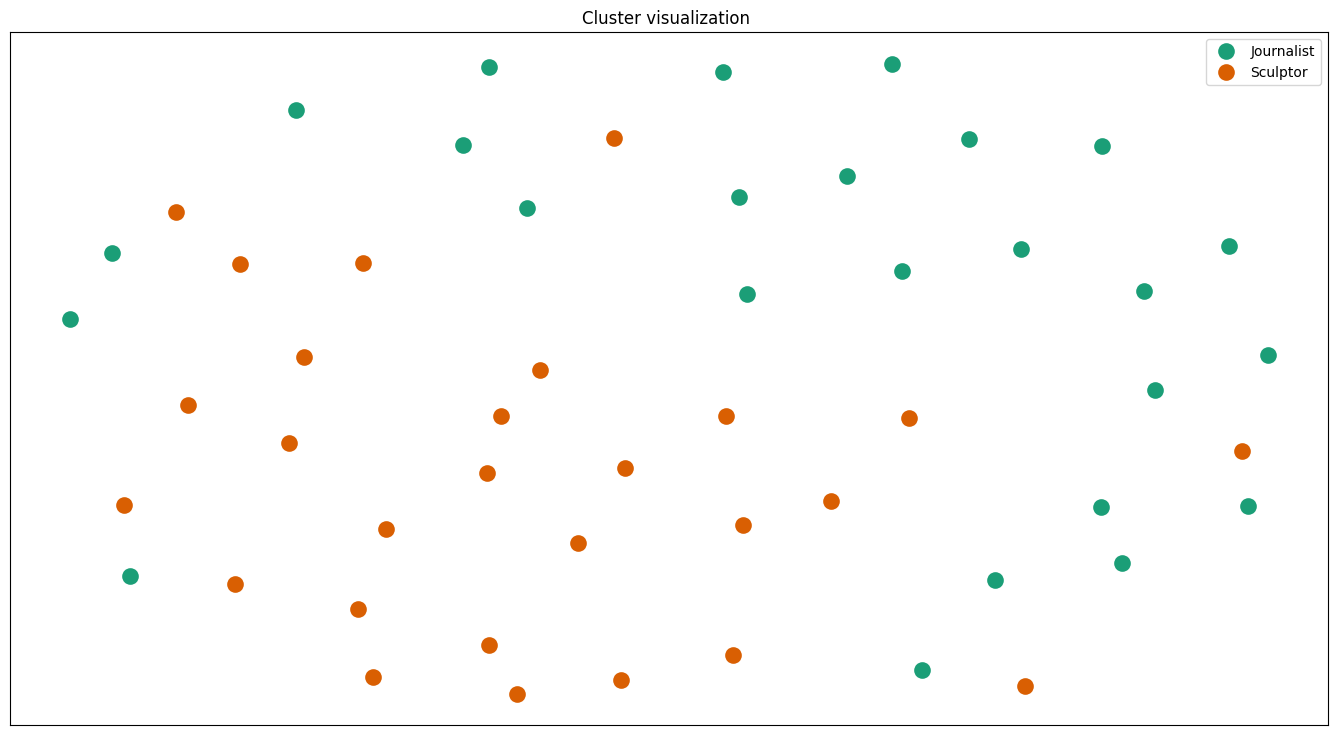

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

#dist_train = 1 - cosine_similarity(X_train_tfidf)
dist_test = 1 - cosine_similarity(X_test_tfidf)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
#pos_train = mds.fit_transform(dist_train)
pos_test = mds.fit_transform(dist_test)
#xs_train, ys_train = pos_train[:, 0], pos_train[:, 1]
xs_test, ys_test = pos_test[:, 0], pos_test[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
#cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
#df_train = pd.DataFrame(dict(x=xs_train, y=ys_train, label=km.labels_))
df_test = pd.DataFrame(dict(x=xs_test, y=ys_test, label=clusters_test))

#group by cluster
groups = df_test.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()